# plot stereonet for KRBS? deep borehole in Wonju KIGAM branch

## read data file csv

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import mplstereonet as mpl

data = np.genfromtxt('/home/bjung/github/dfnWorks/hlwd-2021/data/Az_dip_KSRS_csv.csv',dtype=None,delimiter=',',
                   skip_header=1,usecols=(0,1,2))
        
print(data)
print(data.shape[0])



[[ 54.95  92.44  68.81]
 [ 56.55  10.76  59.18]
 [ 57.5  348.44  47.96]
 ...
 [751.5  166.61  61.53]
 [752.71 187.56  14.94]
 [754.13 175.22  35.55]]
576


In [73]:
depth_m = data[:,0]
strike = (data[:,1])
dip = (data[:,2])

print(strike[0])

92.44


## plot poles on stereonet
NOTE: It seems 0-90-180-270 deg in stereonet correspond to W-N-E-S

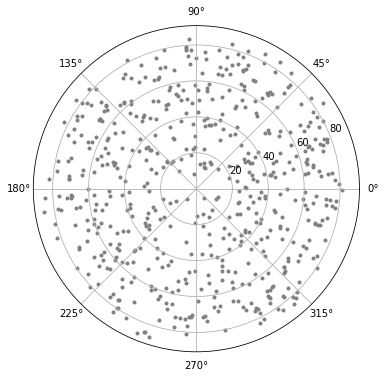

In [74]:
[fig,ax] = mpl.subplots(figsize=(9.8,6),projection='polar')

ax.scatter(strike,dip,marker='.',color='grey')

plt.show()
# What do you know from below figure?

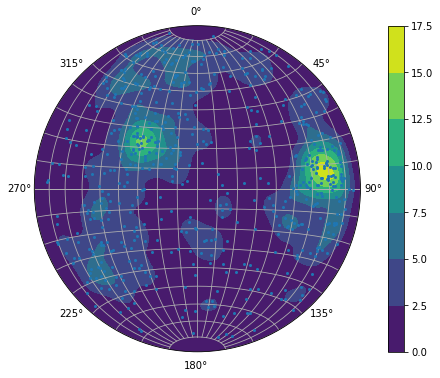

In [75]:
[fig,ax] = mpl.subplots(figsize=(9.8,6),projection='equal_area')

cax = ax.density_contourf(strike,dip,measurement='poles',method='exponential_kamb',sigma=3)

ax.pole(strike,dip,markersize=2)
ax.grid(True)
fig.colorbar(cax)

plt.show()

In [76]:
#ax.density_contourf?

## k-means analysis

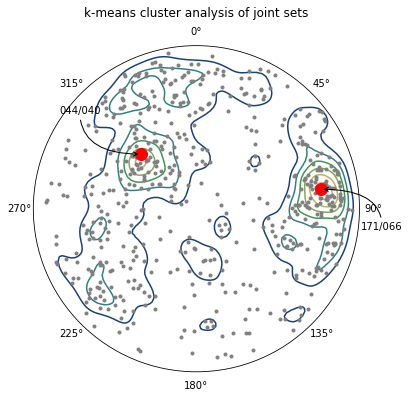

In [77]:
# Plot the raw data and contour it:
fig,ax = mpl.subplots(figsize=(9.8,6),projection='equal_area')

ax.density_contour(strike,dip,measurement='poles',cmap='gist_earth',sigma=3)
ax.pole(strike,dip,marker='.',color='grey')

# Find the two modes
centers = mpl.kmeans(strike, dip, num=2, measurement='poles')
strike_cent,dip_cent = mpl.geographic2pole(*zip(*centers))
ax.pole(strike_cent, dip_cent, 'ro', ms=12)

# Label the modes
for (x0, y0) in centers:
    s, d = mpl.geographic2pole(x0, y0)
    x, y = mpl.pole(s, d) # Otherwise, we may get the antipode...

    if x > 0:
        kwargs = dict(xytext=(40, -40), ha='left')
    else:
        kwargs = dict(xytext=(-40, 40), ha='right')

    ax.annotate('{:03.0f}/{:03.0f}'.format(s[0], d[0]), xy=(x, y),
                xycoords='data', textcoords='offset points',
                arrowprops=dict(arrowstyle='->', connectionstyle='angle3'),
                **kwargs)

ax.set_title('k-means cluster analysis of joint sets', y=1.07)
plt.show()


In [78]:
#mpl.kmeans?

## Group data by k-means center

In [119]:
# calculate distances from every k-means centers 
# a date point is a member of the group having the least distance between the center and data

#mpl.angular_distance?
# we have strike and dip
# we have k-means centers


# convert strike/dip to lon,lat
lond,latd = mpl.pole(strike,dip)
pointd = lond,latd
 
dist_from_center = np.zeros((dip.shape[0],len(centers)))
#print(dist_from_center.shape)

# loop k-means centers
nn=0
for x in centers:
    dist_from_center[:,nn] = mpl.angular_distance(x, pointd, bidirectional=True)
    nn+=1
    
# compare distance from each center and assign the closest on as a group number
grp= np.argmax(dist_from_center,axis=1)

print(grp)


[0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0
 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0
 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 

### fisher statistics

/home/bjung/anaconda3/lib/python3.8/site-packages/mplstereonet/stereonet_transforms.py:139: RuntimeWarning: invalid value encountered in arcsin
  return 2.0 * np.arcsin(0.5 * p)


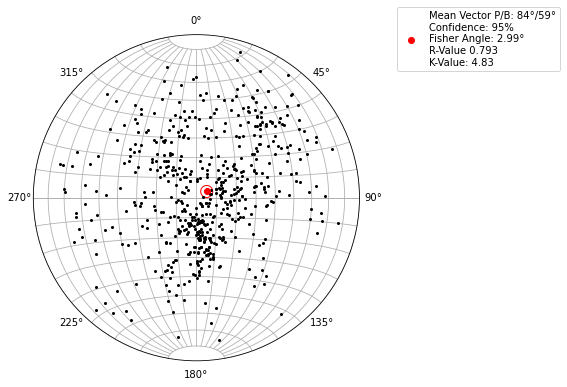

In [8]:
'''
decl = [122.5, 130.5, 132.5, 148.5, 140.0, 133.0, 157.5, 153.0, 140.0, 147.5,
        142.0, 163.5, 141.0, 156.0, 139.5, 153.5, 151.5, 147.5, 141.0, 143.5,
        131.5, 147.5, 147.0, 149.0, 144.0, 139.5]
incl = [55.5, 58.0, 44.0, 56.0, 63.0, 64.5, 53.0, 44.5, 61.5, 54.5, 51.0, 56.0,
        59.5, 56.5, 54.0, 47.5, 61.0, 58.5, 57.0, 67.5, 62.5, 63.5, 55.5, 62.0,
        53.5, 58.0]
'''
confidence = 95

fig,ax = mpl.subplots(figsize=(9.8,6),projection='stereonet')
ax.line(dip,strike,color="black",markersize=2)

vector, stats = mpl.find_fisher_stats(dip,strike,conf=confidence)

template = (u"Mean Vector P/B: {plunge:0.0f}\u00B0/{bearing:0.0f}\u00B0\n"
            "Confidence: {conf}%\n"
            u"Fisher Angle: {fisher:0.2f}\u00B0\n"
            u"R-Value {r:0.3f}\n"
            "K-Value: {k:0.2f}")

label = template.format(plunge=vector[0],bearing=vector[1],conf=confidence,
                        r=stats[0],fisher=stats[1],k=stats[2])

ax.line(vector[0],vector[1],color="red",label=label)
ax.cone(vector[0],vector[1],stats[1],facecolor="None",edgecolor="red")

ax.legend(bbox_to_anchor=(1.1, 1.1),numpoints=1)
ax.grid(True)

plt.show()

We need this to each joint sets